In [1]:
# The algebraic cubic equation
#x**3 - x + c = 0

In [2]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import import_ipynb

In [3]:
# The Hopf bifurcation equations 
def Hopf(t,z,b,s):
    u1, u2 = z[0], z[1]
    return [b*u1 - u2 + s*u1*(u1**2 + u2**2), u1 + b*u2 + s*u2*(u1**2 +u2**2)]

In [4]:
# The modified Hopf bifurcation equations 
def mod_Hopf(t,z,b,s):
    u1, u2 = z[0], z[1]
    return [b*u1 - u2 + s*u1*(u1**2 + u2**2) - u1(u1**2 + u2**2)**2, u1 + b*u2 + s*u2*(u1**2 +u2**2) - u2(u1**2 + u2**2)**2]

In [ ]:
#natural parameter continuation
# b is the parameter we vary
#b = 0.1
#increment = 0.01

#parameter = parameter + increment 
#initial_guess 

In [5]:
def shooting(u0, fun, args):
    u, T = u0[:-1], u0[-1]
    sol = solve_ivp(fun, (0,T), u, args = args, rtol = 1e-6)
    final_states = sol.y[:,-1]
    phase_condition = np.array([fun(T, u, args[0], args[1])[0]])
    return np.concatenate((u-final_states, phase_condition))

In [11]:
#find the roots of the system of 2 ODE's with an initial guess
from scipy.optimize import fsolve
s=-1
root = fsolve(shooting,[1,0,6.2],args = (Hopf, (b,s)))
root

array([ 1.37840556e+00, -2.59988344e-06,  6.28319125e+00])

In [25]:
#Numerical continuation for Hopf bifurcation equations 
#increments the a parameter by a set amount and attempts to find the solution
#for the new parameter value using the last found solution as an initial guess
phase_condition = 20
initial_guess=[1,0,6.2]
roots = []
for b in np.arange(0.1,2,0.1):
    
    root = fsolve(shooting,initial_guess,args = (Hopf, (b,s)))
    initial_guess = root
    roots.append(root)
    
    

[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00])]
[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00]), array([ 4.47214168e-01, -2.29184063e-07,  6.28318593e+00])]
[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00]), array([ 4.47214168e-01, -2.29184063e-07,  6.28318593e+00]), array([ 5.47723671e-01, -6.68259881e-07,  6.28318958e+00])]
[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00]), array([ 4.47214168e-01, -2.29184063e-07,  6.28318593e+00]), array([ 5.47723671e-01, -6.68259881e-07,  6.28318958e+00]), array([ 6.32456978e-01, -1.15682336e-06,  6.28319224e+00])]
[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00]), array([ 4.47214168e-01, -2.29184063e-07,  6.28318593e+00]), array([ 5.47723671e-01, -6.68259881e-07,  6.28318958e+00]), array([ 6.32456978e-01, -1.15682336e-06,  6.28319224e+00]), array([ 7.07108695e-01, -1.91370815e-06,  6.28319493e+00])]
[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00]), array([ 4.47214168e-01, -2.29184063e-07,  6.28318593

[array([3.16227405e-01, 7.22127415e-08, 6.28318090e+00]), array([ 4.47214168e-01, -2.29184063e-07,  6.28318593e+00]), array([ 5.47723671e-01, -6.68259881e-07,  6.28318958e+00]), array([ 6.32456978e-01, -1.15682336e-06,  6.28319224e+00]), array([ 7.07108695e-01, -1.91370815e-06,  6.28319493e+00]), array([ 7.74599092e-01, -2.90702841e-06,  6.28319808e+00]), array([ 8.36663737e-01, -5.19519221e-06,  6.28320274e+00]), array([ 8.94432243e-01, -8.08284037e-06,  6.28320942e+00]), array([ 9.48689239e-01, -1.06948348e-05,  6.28321962e+00]), array([ 1.00001055e+00, -2.11039601e-05,  6.28323668e+00]), array([ 1.04882122e+00, -2.72271061e-05,  6.28324725e+00]), array([ 1.09545563e+00, -2.52419919e-05,  6.28322858e+00]), array([ 1.14018045e+00, -1.30728870e-05,  6.28321141e+00]), array([ 1.18321911e+00, -8.84365633e-06,  6.28320306e+00]), array([ 1.22474741e+00, -7.60091672e-06,  6.28319856e+00]), array([ 1.26491251e+00, -4.61251017e-06,  6.28319553e+00]), array([ 1.30384196e+00, -5.01378211e-06,  

In [24]:
# Numerical continuation for modified Hopf bifurcation equations 
#increments the a parameter by a set amount and attempts to find the solution
#for the new parameter value using the last found solution as an initial guess
phase_condition = 20
s = -1
roots = []
initial_guess=[2,2,2,phase_condition]
for b in np.arange(2,-1,0.1):
    root = fsolve(shooting,initial_guess,args = (mod_Hopf, (b,s)))
    roots.append(root)
    print(roots)
    

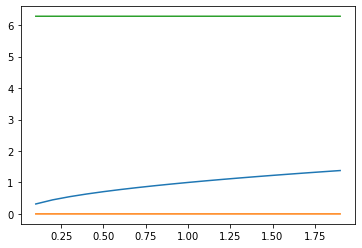

In [18]:
# This should be correct
# plotting numerical continuation for Hopf bifurcation
# blue line is x variable
# orange line is y varaible 
# green line is period 

plt.plot(np.arange(0.1,2,0.1), roots)

In [22]:
plt.plot(np.arange(0.1,2,0.1), roots)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# plotting numerical continuation for modified Hopf bifurcation
plt.plot(np.arange(2,-1,0.1), roots)